# 1. Looking back
I found the neural recordings data to be quite interesting. The real-time, nearly full spatial mapping of a brain region has fascinating implications for understanding nueral mechanisms and plasticity. 
I'm curious about what additional elements are needed for learning (e.g. whether reward is necessary). If nothing else is required perhaps the

The point to answer from the paper discussion is how the mechanistic learning could be seen in data. Once we've classified the neurons we can look at signal which spikes them. What happens when these signals are endlessly repeated? This could be as simple as going back into the data and finding the movie patterns which trigger a particular class. Does the signal repeat consistently?

# 2. Coarse-Graining

In [1]:
import sys, time, os
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(2018)

### Create a simple dataset
Let's make a dataset which consists of two sets. I had some trouble understanding the point of this assignment, but here is what seems like a trivial data set. The first set has high expression of the first five species and the second set has high expression of the last five species.

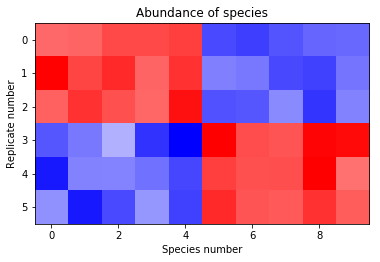

In [5]:
 ## create a dataset where the first half is big, and the second half is small
data = np.zeros((6,10))
sig = 0.2
big = 2
small= 0.05
for set_num in range(2):
    for rep_num in range(3):
        if set_num: 
            first = small; second = big
        else:
            first = big; second = small
        first_half  =  first + sig*np.random.randn(5)
        second_half = second + sig*np.random.randn(5)
        abundance = np.append(first_half,second_half)

        data[set_num*3 + rep_num] = abundance

## make a plot
plt.figure()
plt.imshow(data,cmap='bwr')
plt.xlabel("Species number")
plt.ylabel("Replicate number")
plt.title("Abundance of species")
plt.show()

### Coarse-graining option 1/2
One easy possibility for a coarse graining is the average of the first 5 species. Perhaps we believe these to be 'important' species, e.g. those which breaks down the original sugar.

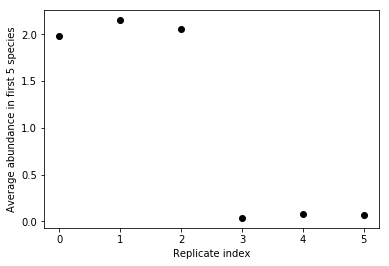

In [13]:
for i,abundance in enumerate(data):
    x = np.mean(abundance[:5])
    plt.plot(i,x, 'ok')
plt.xlabel("Replicate index")
plt.ylabel("Average abundance in first 5 species");

### Coarse-graining option 2/2
The first strategy is a bit ad-hoc. Instead we can use distance to the first cluster.

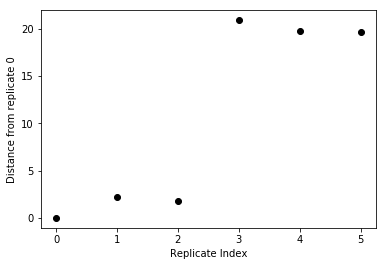

In [15]:
 base = data[0]
for i,abundance in enumerate(data):
    dist = sum(np.sqrt((base-abundance)**2))
    plt.plot(i,dist, 'ok')
    plt.xlabel("Replicate Index")
    plt.ylabel("Distance from replicate 0")

### Bad coarse graining
Of course, it's easy to come up with a bad coarse graining via simply averaging over the "wrong set".

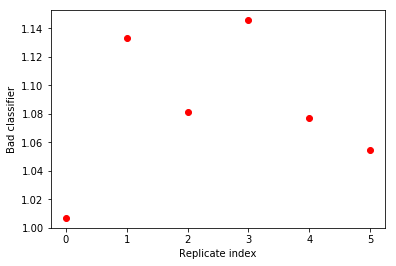

In [17]:
avg = data.mean(axis=1)
plt.plot(range(len(avg)), avg, 'or')
plt.xlabel("Replicate index")
plt.ylabel("Bad classifier");

### Comparing coarse-graining with ANOVA
Given some method of coarse-graining into two bins, how can we clearly say whether they are different _enough_. Our default position should be that we don't know whether they are or not, and we consider how strongly our proposed metric distinguishes groups. We should quantify how "far away" the two groups are in units of the intrinsic spread of the dataset. This is exactly the idea of analysis of variance. It yields a statstic (an F-statistic) which quantifies how confidently we may reject the null hypothesis that there is no difference between our coarse-grained categories.

The strategy of ANOVA compares two variances. Variance, as always, is taken with respect to two means. ANOVA splits the variance into two comparison means. First is the variance of each proposed "treatments"- here the results of a coarse-graining- compared to the global, untreated mean. The second variance is every individual point to the global mean. The first variance can be thought of as signal, which is how far my categories are from 'null'. And the second is the background noise of uncategorized data. If the signal to noise ratio is high then the reduction is a legitimate one. More specifically, it is an instance of hypothesis testing. We are quantifying how strongly we reject the null hypothesis that there is no difference between sets.